In [156]:
#!~/.conda/envs/lra/bin/python3
import os
import sys
import re
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from collections import defaultdict 
from matplotlib.collections import PathCollection
import numpy as np
import random

os.chdir(r"/project/mchaisso_100/cmb-16/jingwenr/trfCall/revision/simulation")
# input_path = ""

In [157]:
gt_sim_mode = ["r1-cov30", "r1-g1-l2to4-cov30" , "r2-cov30", "r2-g1-l2to4-cov30", "0% diver"]
gt_sim_dict = {"0% diver" : "0% diver", \
               "r1-cov30" : "1% diver",\
               "r2-cov30" : "2% diver", \
               "r1-g1-l2to4-cov30" : "1% diver + 1% gap", \
               "r2-g1-l2to4-cov30" : "2% diver + 1% gap"}

In [158]:
data_dict = {
     "vntr" : [], \
     "sim_mode" : [], \
     "relative_diff" : [], \
     "read_type": []}

subset_index_set = set(random.sample(list(range(1, 374602)), 2000))

In [159]:
# read in the 0% diver

file_path = "r1-cov30/vntr.diver-yes.comp.tsv"

with open(file_path, 'r') as fin:
    lines = fin.readlines()
    for i, line in enumerate(lines):
        if i not in subset_index_set: continue 
            
        line = line.rstrip('\n')
        if line.startswith('coor'): continue 
        fields = line.split('\t')
        vntr = fields[0]
        asm = float(fields[1])
        hifi = float(fields[4])
        ont = float(fields[3])

        d = {"assembly": asm, "HiFi": hifi, "ONT": ont}
        for k, v in d.items():
            data_dict['vntr'].append(vntr)
            data_dict["sim_mode" ].append("0% diver")
            data_dict["read_type" ].append(k)
            data_dict["relative_diff" ].append(v)

In [160]:
# read other settings
for mode in ["r1-cov30", "r1-g1-l2to4-cov30" , "r2-cov30", "r2-g1-l2to4-cov30"]:

    file_path = f"{mode}/vntr.diver-yes.comp.tsv"
    with open(file_path, 'r') as fin:
        lines = fin.readlines()
        for i, line in enumerate(lines):
            
            if i not in subset_index_set: continue 
            
            line = line.rstrip('\n')
            if line.startswith('coor'): continue 
            fields = line.split('\t')
            
            vntr = fields[0]
            asm = float(fields[5])
            hifi = float(fields[8])
            ont = float(fields[7])

            d = {"assembly": asm, "HiFi": hifi, "ONT": ont}
            for k, v in d.items():
                data_dict['vntr'].append(vntr)
                data_dict["sim_mode" ].append(gt_sim_dict[mode])
                data_dict["read_type" ].append(k)
                data_dict["relative_diff" ].append(v)

In [161]:
df = pd.DataFrame.from_dict(data_dict)

In [162]:
df

,vntr,sim_mode,relative_diff,read_type
0,chr1_908586-908852,0% diver,0.327273,assembly
1,chr1_908586-908852,0% diver,0.636364,HiFi
2,chr1_908586-908852,0% diver,0.618182,ONT
3,chr1_5557318-5557344,0% diver,0.020619,assembly
4,chr1_5557318-5557344,0% diver,0.051546,HiFi
...,...,...,...,...
29995,chrX_109875072-109875073,2% diver + 1% gap,0.083333,HiFi
29996,chrX_109875072-109875073,2% diver + 1% gap,0.154762,ONT
29997,chrX_226354-226440,2% diver + 1% gap,0.091837,assembly
29998,chrX_226354-226440,2% diver + 1% gap,0.132653,HiFi


/home1/jingwenr/.conda/envs/nb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home1/jingwenr/.conda/envs/nb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home1/jingwenr/.conda/envs/nb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home1/jingwenr/.conda/envs/nb/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home1/jingwenr/.conda/envs/nb/lib/pytho

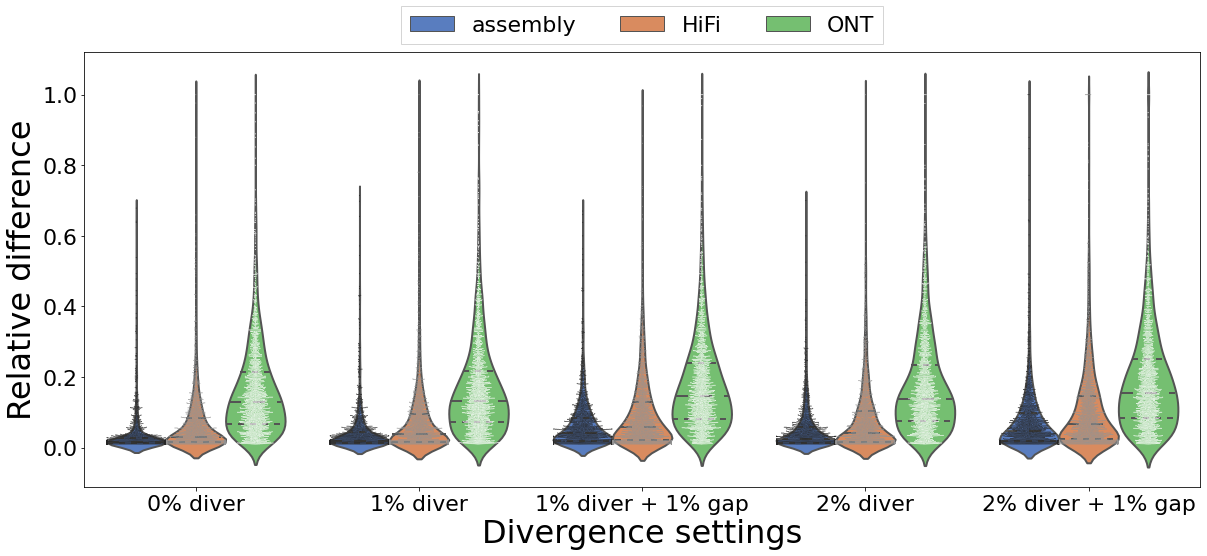

In [174]:
plt.figure(figsize=(20, 8))
sns.swarmplot(x ='sim_mode', y ='relative_diff', hue="read_type", data = df, \
						s=1.0, color="white", edgecolor="gray", dodge=True)
ax = sns.violinplot(x="sim_mode", y="relative_diff", hue="read_type", data = df, \
                        palette="muted", scale="width", inner="quartile", linewidth=2)
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:3], labels[0:3], fontsize=22, loc='upper center', bbox_to_anchor=(0.5, 1.13), ncol=3, fancybox=False, shadow=False)
plt.xlabel("Divergence settings", fontsize=32)
plt.ylabel("Relative difference", fontsize=32)
ax.tick_params(axis="x", labelsize=22)
ax.tick_params(axis="y", labelsize=22)
plt.savefig("/project/mchaisso_100/cmb-16/jingwenr/trfCall/revision/plot/simulation.png", dpi=300, format="png")
plt.show()
plt.close() 